In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import editdistance

In [4]:
vae_data=pd.read_csv("../VAE_target.csv")
GAS1_data=pd.read_csv('../GAS1_target_20190516.csv')
GAS1_data=GAS1_data[GAS1_data.control==1] #load the WT/Stop benchmarks

In [5]:
len(vae_data["Unnamed: 0.1"].unique())

7446

In [7]:
vae_data=vae_data[vae_data.VAE_plasmid_N>99]#only take samples with at least 100 plasmids
vae_data.head(2)

,Unnamed: 0,Unnamed: 0.1,EK268_VAE_p1_rep1a_plasmid,EK268_VAE_p1_rep1b_plasmid,EK268_VAE_p1_rep1c_plasmid,EK268_VAE_p1_rep1d_plasmid,EK268_VAE_v1_rep1a_virus,EK268_VAE_v1_rep1b_virus,EK268_VAE_v1_rep1c_virus,EK268_VAE_v1_rep1d_virus,...,mut,rep_i,rep_original,rep_total,VAE_plasmid_N,VAE_virus_N,VAE_plasmid_F,VAE_virus_F,VAE_virus_S,wt_conserved_pos
0,414144,GACGAAGAGGAAATCAGGACAACCAATCCCGTGGCTACGGAGCAGT...,176,132,145,61,6950,5562,14354,2471,...,6,1,1,1,514,55578,0.000107,0.006210,5.852979,22
1,414145,TCAGAAGAGGAAATCAGGACAACCAATCCCGTGGCTACGGAGCAGT...,224,128,195,93,685,521,1320,247,...,7,1,1,1,640,4496,0.000134,0.000502,1.908876,21


In [8]:
len(vae_data), len(vae_data["Unnamed: 0.1"].unique())

(7409, 7409)

In [9]:
mapper={}
for col in vae_data.columns:
    if col.startswith("EK"):
        mapper[col]=col[col.index("VAE"):]
vae_data=vae_data.rename(columns=mapper)

In [10]:
vae_data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'VAE_p1_rep1a_plasmid',
       'VAE_p1_rep1b_plasmid', 'VAE_p1_rep1c_plasmid', 'VAE_p1_rep1d_plasmid',
       'VAE_v1_rep1a_virus', 'VAE_v1_rep1b_virus', 'VAE_v1_rep1c_virus',
       'VAE_v1_rep1d_virus', 'VAE_v2_rep2a_virus', 'VAE_v2_rep2b_virus',
       'VAE_v2_rep2c_virus', 'VAE_v2_rep2d_virus', 'aa', 'category', 'chip',
       'control', 'is_wt_aa', 'is_wt_nt', 'mask', 'mut', 'rep_i',
       'rep_original', 'rep_total', 'VAE_plasmid_N', 'VAE_virus_N',
       'VAE_plasmid_F', 'VAE_virus_F', 'VAE_virus_S', 'wt_conserved_pos'],
      dtype='object')

<AxesSubplot:>

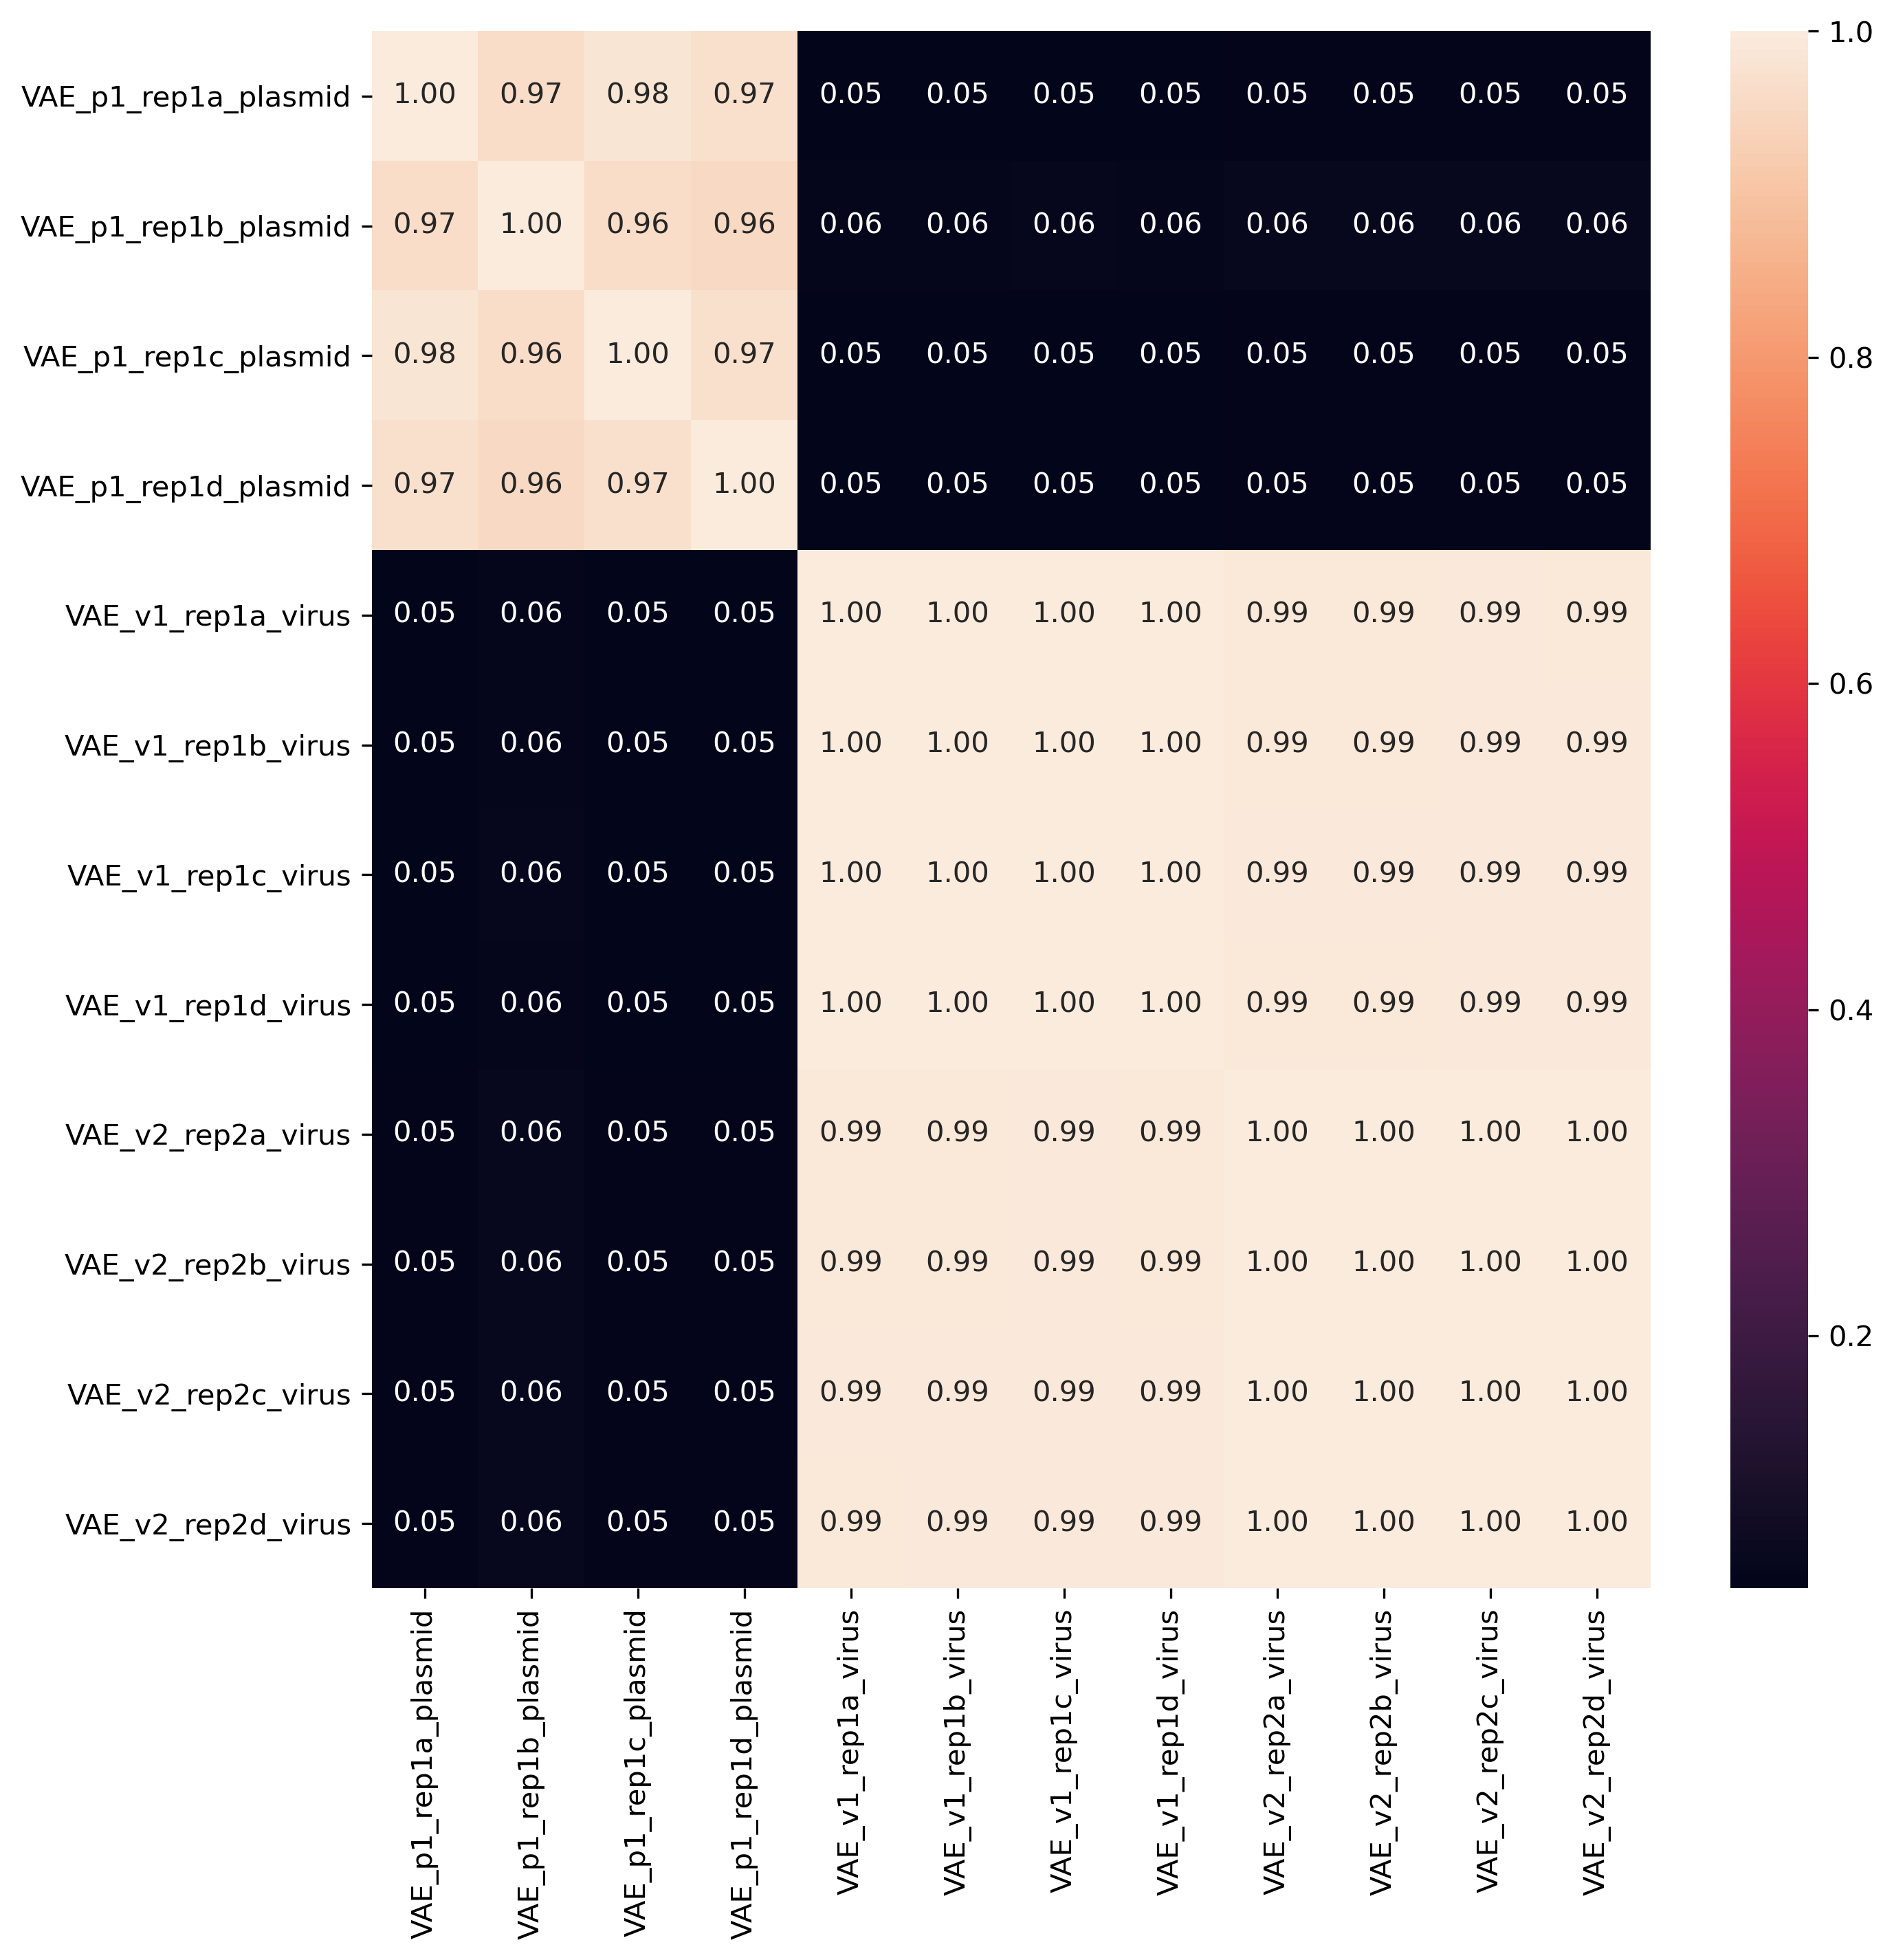

In [11]:
plt.figure(figsize=(10,10), dpi=300)
rep_cols=['VAE_p1_rep1a_plasmid',
       'VAE_p1_rep1b_plasmid', 'VAE_p1_rep1c_plasmid', 'VAE_p1_rep1d_plasmid',
       'VAE_v1_rep1a_virus', 'VAE_v1_rep1b_virus', 'VAE_v1_rep1c_virus',
       'VAE_v1_rep1d_virus', 'VAE_v2_rep2a_virus', 'VAE_v2_rep2b_virus',
       'VAE_v2_rep2c_virus', 'VAE_v2_rep2d_virus']
sns.heatmap(vae_data[rep_cols].corr(), annot=True, fmt='.2f')
#plt.savefig('new_figs/replicability_exp.pdf')

In [12]:
replicates= vae_data[vae_data.duplicated(subset=["aa"],keep=False)]

In [13]:
len(replicates)

196

In [14]:
len(replicates.aa.unique())

78

In [15]:
list_of_values=[]
for sequence in replicates.aa.unique():
    list_of_values.append(tuple(replicates[replicates.aa==sequence]["VAE_virus_S"]))

In [16]:
from scipy.stats import pearsonr

(0.9913549694487536, 8.483131395632598e-69)


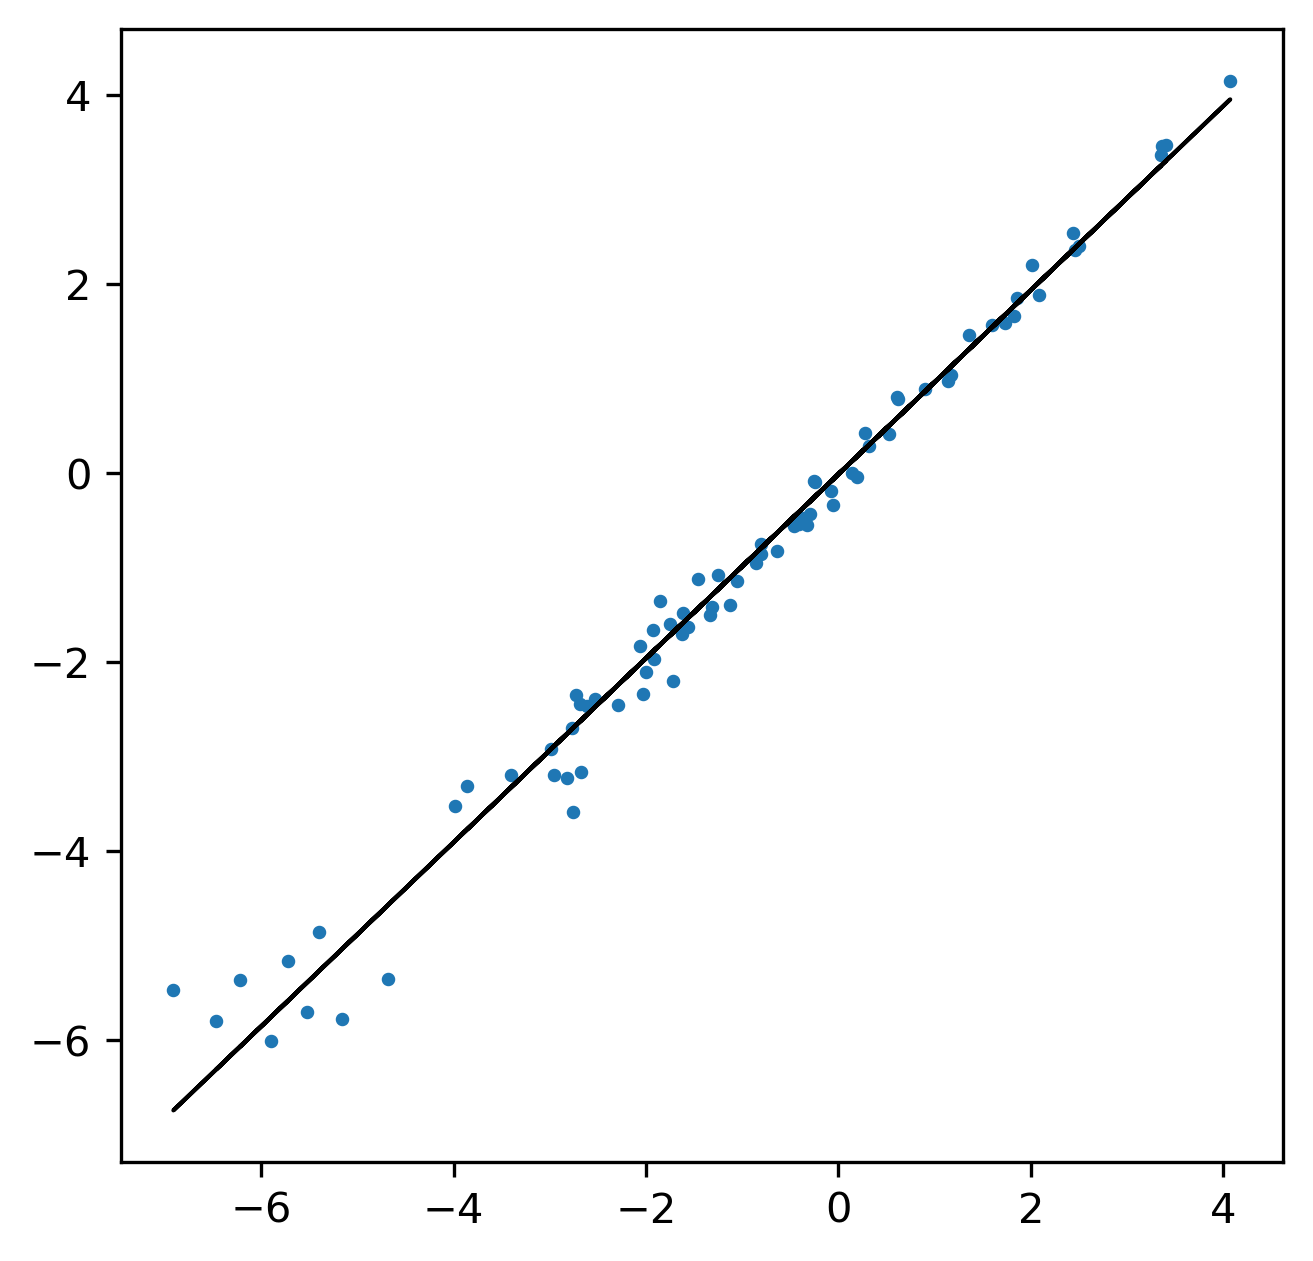

In [17]:
#list_of_values
plt.figure(figsize=(5,5), dpi=300)
m, b = np.polyfit([x[0] for x in list_of_values], [x[1] for x in list_of_values], 1)
plt.plot([x[0] for x in list_of_values], [m*x[0]+b for x in list_of_values],linewidth=1,color="k")
plt.scatter([x[0] for x in list_of_values], [x[-1] for x in list_of_values], s=5)
print (pearsonr([x[0] for x in list_of_values], [x[-1] for x in list_of_values]) )
#plt.savefig('new_figs/pearson0.991_replicates.pdf')

In [18]:
vae_data_orig=vae_data

In [19]:
original_predicted = pd.read_csv("untitled folder/chip2_vae.csv", index_col=None)
original_predicted =original_predicted[["category","lin_fit","pred_fit","sampling","seq","wt_dist"]]

In [20]:
original_predicted["category"]=original_predicted["category"]+"__vae"
original_predicted.head()

,category,lin_fit,pred_fit,sampling,seq,wt_dist
0,vae_aligned_only__vae,-47.652505,29.069985,most_likely,DEEEIRTTNPVATEQYGVTATNLQNSNT,6
1,vae_aligned_only__vae,-48.071833,28.955883,most_likely,SEEEIRTTNPVATEQYGTTATNLQSSNT,7
2,vae_aligned_only__vae,-47.482053,28.946108,most_likely,DEEEIRTTNPVATEQYGVTATNLQNSTT,7
3,vae_aligned_only__vae,-47.745287,28.280085,most_likely,DEEEIRTTNPVATEQYGVTATNLQSSNT,6
4,vae_aligned_only__vae,-46.253139,28.170899,most_likely,DEEEIRTTNPVATEQYGTTATNLQNSNT,6


In [21]:
#from glob import glob
#original_predicted = pd.concat([pd.read_csv(f,nrows=1250) for f in glob('untitled folder/*.csv')], ignore_index = True)

summary_columns=["aa","mask","VAE_virus_S","mut","category","wt_conserved_pos"]
original_predicted.columns=["category_orig","lin_fit","pred_fit","sampling","aa","wt_dist"]

vae_data_v=original_predicted[original_predicted.category_orig.str.startswith("vae")].merge(vae_data_orig[summary_columns],on=["aa"], how="left")
vae_data_l=original_predicted[original_predicted.category_orig.str.startswith("lin")].merge(vae_data_orig[summary_columns],on=["aa"], how="left")

In [22]:
len(vae_data_l)

4053

In [23]:
len(vae_data_v)

3822

In [24]:
vae_data=vae_data_v.append(vae_data_l)

In [25]:
len(vae_data)

7875

In [26]:
len(vae_data.aa.unique())

7335

In [28]:
len(original_predicted)

7500

In [29]:
original_predicted["category_orig"].value_counts()

lin_aligned_random__vae    1250
vae_aligned_random__vae    1250
lin_all__vae               1250
vae_all__vae               1250
vae_aligned_only__vae      1250
lin_aligned_only__vae      1250
Name: category_orig, dtype: int64

In [30]:
vae_data.head()

,category_orig,lin_fit,pred_fit,sampling,aa,wt_dist,mask,VAE_virus_S,mut,category,wt_conserved_pos
0,vae_aligned_only__vae,-47.652505,29.069985,most_likely,DEEEIRTTNPVATEQYGVTATNLQNSNT,6,_________________VTA____NS_T,5.852979,6.0,vae_aligned_only__vae,22.0
1,vae_aligned_only__vae,-48.071833,28.955883,most_likely,SEEEIRTTNPVATEQYGTTATNLQSSNT,7,S________________TTA____SS_T,1.908876,7.0,vae_aligned_only__vae,21.0
2,vae_aligned_only__vae,-47.482053,28.946108,most_likely,DEEEIRTTNPVATEQYGVTATNLQNSTT,7,_________________VTA____NSTT,5.812721,7.0,vae_aligned_only__vae,21.0
3,vae_aligned_only__vae,-47.745287,28.280085,most_likely,DEEEIRTTNPVATEQYGVTATNLQSSNT,6,_________________VTA____SS_T,5.537211,6.0,vae_aligned_only__vae,22.0
4,vae_aligned_only__vae,-46.253139,28.170899,most_likely,DEEEIRTTNPVATEQYGTTATNLQNSNT,6,_________________TTA____NS_T,5.341769,6.0,vae_aligned_only__vae,22.0


In [31]:
vae_data=vae_data.dropna(subset=["category"])

In [32]:
len(vae_data)

7830

In [33]:
from scipy.stats import norm
mean_stop,std_stop=norm.fit(GAS1_data[GAS1_data.category=="stop"].GAS1_virus_S.dropna())
mean_wt,std_wt=norm.fit(GAS1_data[GAS1_data.category=="wild_type"].GAS1_virus_S.dropna())
print("WT")
print(f'mean:{mean_wt},std:{std_wt}')
print("Stop")
print(f'mean:{mean_stop},std:{std_stop}')

WT
mean:-0.8072145642175363,std:0.9179095002676592
Stop
mean:-5.470187705209944,std:1.030520385292783


In [34]:
decision_boundary=((mean_stop+2*std_stop)+(mean_wt-2*std_wt))/2
better_boundary=mean_wt+3*std_wt
wt_boundary=mean_wt
GAS1_data["GAS1_virus_S"]=GAS1_data["GAS1_virus_S"]-wt_boundary
decision_boundary=decision_boundary-wt_boundary
wt_boundary=0

In [35]:
vae_data["VAE_virus_S"]=vae_data["VAE_virus_S"]-mean_wt
decision_boundary=decision_boundary-wt_boundary


/Users/sumsin/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/sumsin/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/sumsin/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

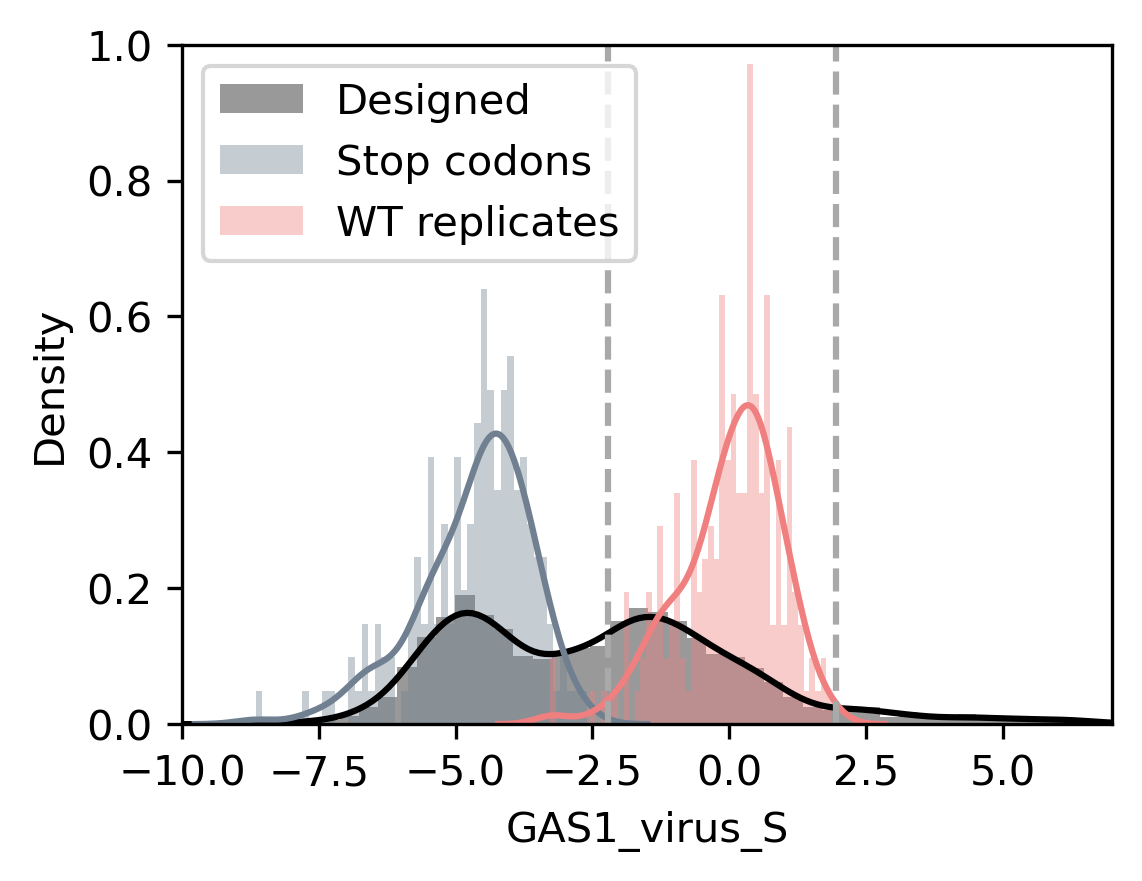

In [36]:
plt.figure(figsize=(4,3),dpi=300)
sns.distplot(vae_data.VAE_virus_S.dropna(),bins=50, label="Designed", color="k" )
sns.distplot(GAS1_data[GAS1_data.category=="stop"].GAS1_virus_S.dropna()+wt_boundary,bins=50, color="slategrey",label="Stop codons")
sns.distplot(GAS1_data[GAS1_data.category=="wild_type"].GAS1_virus_S.dropna()+wt_boundary,bins=50,color="lightcoral", label="WT replicates");
plt.plot([decision_boundary, decision_boundary],[0,1], "--",c="darkgrey")
plt.plot([better_boundary,better_boundary],[0,1], "--",c="darkgrey")

# plt.ylabel("Frequency")
# plt.xlabel("Selection score")
plt.ylim(0,1)
plt.xlim(-10,7)
plt.legend()
#plt.savefig("new_figs/stop_v_wt_green.pdf")

In [37]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=2, random_state=0).fit(np.array(vae_data[vae_data.VAE_virus_S<5].VAE_virus_S.dropna()).reshape(-1,1))
gm.means_, gm.covariances_

(array([[-1.33921482],
        [-4.92117812]]),
 array([[[4.17990194]],
 
        [[0.73172805]]]))

/Users/sumsin/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/sumsin/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/sumsin/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

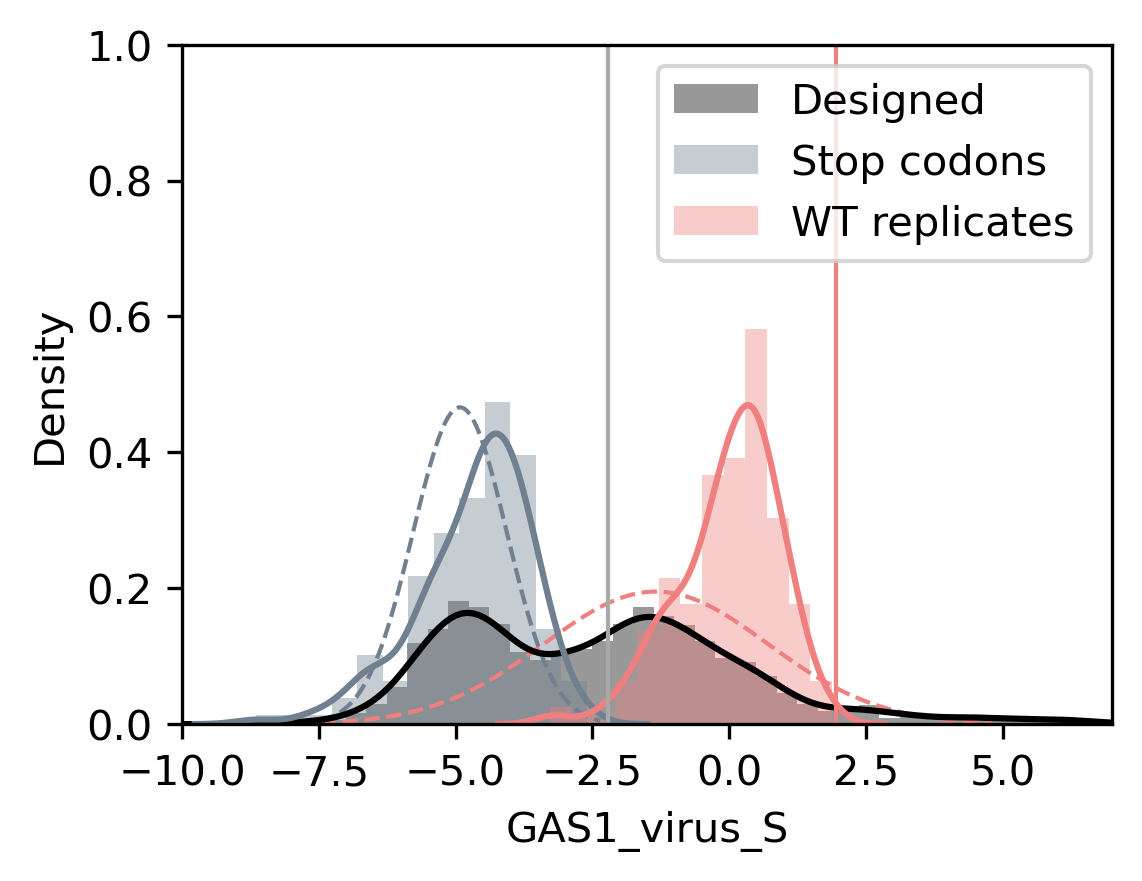

In [39]:
from scipy import stats
plt.figure(figsize=(4,3),dpi=300)


mu_wt=gm.means_[0][0]
sigma_wt=np.sqrt(gm.covariances_[0][0])

mu_stop=gm.means_[1][0]
sigma_stop=np.sqrt(gm.covariances_[1][0])

x = np.linspace(mu_wt - 3*sigma_wt, mu_wt + 3*sigma_wt, 100)
plt.plot(x, stats.norm.pdf(x, mu_wt, sigma_wt),"--",  c="lightcoral", linewidth=1)


# x = np.linspace(mean_wt - 3*std_wt, mean_wt + 3*std_wt, 100)
# plt.plot(x, stats.norm.pdf(x, mean_wt, std_wt),":",  c="lightcoral", linewidth=1)

x = np.linspace(mu_stop - 3*sigma_stop, mu_stop + 3*sigma_stop, 100)
plt.plot(x, stats.norm.pdf(x, mu_stop, sigma_stop),"--",  c="slategrey", linewidth=1)

# x = np.linspace(mean_stop - 3*std_wt, mean_stop + 3*std_wt, 100)
# plt.plot(x, stats.norm.pdf(x, mean_stop, std_stop),":",  c="slategrey", linewidth=1)

sns.distplot(vae_data.VAE_virus_S.dropna(), label="Designed", color="k" )
sns.distplot(GAS1_data[GAS1_data.category=="stop"].GAS1_virus_S.dropna()+wt_boundary, color="slategrey",label="Stop codons")
sns.distplot(GAS1_data[GAS1_data.category=="wild_type"].GAS1_virus_S.dropna()+wt_boundary,color="lightcoral", label="WT replicates");

plt.plot([decision_boundary, decision_boundary],[0,1],c="darkgrey",linewidth=1)
plt.plot([better_boundary,better_boundary],[0,1],c="lightcoral",linewidth=1)
plt.ylim(0,1)
plt.xlim(-10,7)
plt.legend()
#plt.savefig("new_figs/stop_v_wt_mixture.pdf")

In [40]:
#make a copy to manipulate
sub_vae_data=vae_data

In [41]:
renames_methods={"lin_aligned_only__vae": "IS-MSA", 
"vae_aligned_only__vae": "VAE-MSA", "vae_all__vae": "VAE-MSA+", "lin_all__vae":"IS-MSA+", 
                "lin_aligned_random__vae": "IS-MSAr",'vae_aligned_random__vae':"VAE-MSAr"}
sub_vae_data=sub_vae_data.replace(renames_methods)

color_key={ "IS-MSA":"salmon" , "VAE-MSA":"plum" , "VAE-MSA+":"darkviolet" , "IS-MSA+":"darkred",\
          "IS-MSAr":"red", "VAE-MSAr":"magenta"}
sub_vae_data["colors"]=sub_vae_data["category_orig"].map(color_key)
summary_columns=["aa","mask","VAE_virus_S","mut","category","wt_conserved_pos"]

summary_columns+=["colors"]

top_sub=sub_vae_data.nlargest(100,"VAE_virus_S")[summary_columns]
top_sub.head(10)

,aa,mask,VAE_virus_S,mut,category,wt_conserved_pos,colors
2568,DEEEIATTNPVATEQYGEVSTNLQRGGR,_____A___________E________G_,8.750552,3.0,VAE-MSA+,25.0,darkviolet
2563,DEEEIATTNPVATEQYGEVSTNLQRGNR,_____A___________E__________,8.366649,2.0,VAE-MSA+,26.0,darkviolet
2860,DEQEVAATNPVGTEVYGGVATNLQRTTT,__Q_VAA____G__V__G_A_____TTT,7.813858,11.0,VAE-MSA+,17.0,darkviolet
2857,DEQEVAATNPVGTEIYGGVATNLQRTTT,__Q_VAA____G__I__G_A_____TTT,7.696729,11.0,VAE-MSA+,17.0,darkviolet
2782,DEQEVAATNPVSTEIYGGVATNLQRTTT,__Q_VAA____S__I__G_A_____TTT,7.582630,11.0,VAE-MSA+,17.0,darkviolet
1266,DEEEIRTTNPVATEQYGTVSTNLQRGNT,_________________T_________T,7.254887,2.0,VAE-MSAr,26.0,magenta
2559,DEEEIRTTNPVATEQYGSVSTDLQRGER,_____________________D____E_,7.123681,2.0,VAE-MSA+,26.0,darkviolet
2907,DEQEVAATNPVGTEIYGGVATNLQNTTT,__Q_VAA____G__I__G_A____NTTT,7.072987,12.0,VAE-MSA+,16.0,darkviolet
2879,DEEEIRTTNSVATEQYGSVSTNLQRGNE,_________S_________________E,6.886850,2.0,IS-MSA+,26.0,darkred
12,DEEEIRTTNPVATEQYGVTADNLQNSST,_________________VTAD___NSST,6.796274,8.0,VAE-MSA,20.0,plum


In [42]:
for x in sub_vae_data.category_orig.unique():
    selected=sub_vae_data[sub_vae_data.category_orig==x]
    print(x)
    print ("percent >wt")
    print(len(selected[selected.VAE_virus_S>better_boundary].aa.unique())/len(selected.aa.unique()))
    print ("# >wt")
    print(len(selected[selected.VAE_virus_S>better_boundary].aa.unique()))
    print ("percent viable")
    print(len(selected[selected.VAE_virus_S>decision_boundary].aa.unique())/len(selected.aa.unique())) 

    print ("# viable")
    print(len(selected[selected.VAE_virus_S>decision_boundary].aa.unique()))

    print ("max mutant")
    print(selected[selected.VAE_virus_S>decision_boundary]["mut"].max())
    print (len(selected.aa.unique()))

VAE-MSA
percent >wt
0.03784219001610306
# >wt
47
percent viable
0.30998389694041867
# viable
385
max mutant
28.0
1242
VAE-MSAr
percent >wt
0.0499194847020934
# >wt
62
percent viable
0.4726247987117552
# viable
587
max mutant
27.0
1242
VAE-MSA+
percent >wt
0.042638777152051485
# >wt
53
percent viable
0.29766693483507645
# viable
370
max mutant
27.0
1243
IS-MSA
percent >wt
0.0
# >wt
0
percent viable
0.29830234438156833
# viable
369
max mutant
27.0
1237
IS-MSAr
percent >wt
0.002411575562700965
# >wt
3
percent viable
0.46864951768488744
# viable
583
max mutant
14.0
1244
IS-MSA+
percent >wt
0.16042780748663102
# >wt
180
percent viable
0.9269162210338681
# viable
1040
max mutant
5.0
1122


In [43]:
sub_vae_data["beats_wt"]=sub_vae_data.VAE_virus_S.apply(lambda x: 1 if x > better_boundary else 0 )
sub_vae_data["viable"]=sub_vae_data.VAE_virus_S.apply(lambda x: 1 if x > decision_boundary else 0 )

In [44]:
VAEMSAp=sub_vae_data[sub_vae_data.category_orig=="VAE-MSA+"].drop_duplicates(subset="aa").groupby(["mut"], as_index=False).mean()
VAEMSAr=sub_vae_data[sub_vae_data.category_orig=="VAE-MSAr"].drop_duplicates(subset="aa").groupby(["mut"], as_index=False).mean()
VAEMSA=sub_vae_data[sub_vae_data.category_orig=="VAE-MSA"].drop_duplicates(subset="aa").groupby(["mut"], as_index=False).mean()

ISMSA=sub_vae_data[sub_vae_data.category_orig=="IS-MSA"].drop_duplicates(subset="aa").groupby(["mut"], as_index=False).mean()
ISMSAp=sub_vae_data[sub_vae_data.category_orig=="IS-MSA+"].drop_duplicates(subset="aa").groupby(["mut"], as_index=False).mean()
ISMSAr=sub_vae_data[sub_vae_data.category_orig=="IS-MSAr"].drop_duplicates(subset="aa").groupby(["mut"], as_index=False).mean()


In [45]:
countsVMSAp=sub_vae_data[sub_vae_data.category_orig=="VAE-MSA+"].drop_duplicates(subset="aa").groupby("mut").count()['aa']
countsVMSAr=sub_vae_data[sub_vae_data.category_orig=="VAE-MSAr"].drop_duplicates(subset="aa").groupby("mut").count()['aa']
countsVMSA=sub_vae_data[sub_vae_data.category_orig=="VAE-MSA"].drop_duplicates(subset="aa").groupby("mut").count()['aa']

countsISMSA=sub_vae_data[sub_vae_data.category_orig=="IS-MSA"].drop_duplicates(subset="aa").groupby("mut").count()['aa']
countsISMSAp=sub_vae_data[sub_vae_data.category_orig=="IS-MSA+"].drop_duplicates(subset="aa").groupby("mut").count()['aa']
countsISMSAr=sub_vae_data[sub_vae_data.category_orig=="IS-MSAr"].drop_duplicates(subset="aa").groupby("mut").count()['aa']


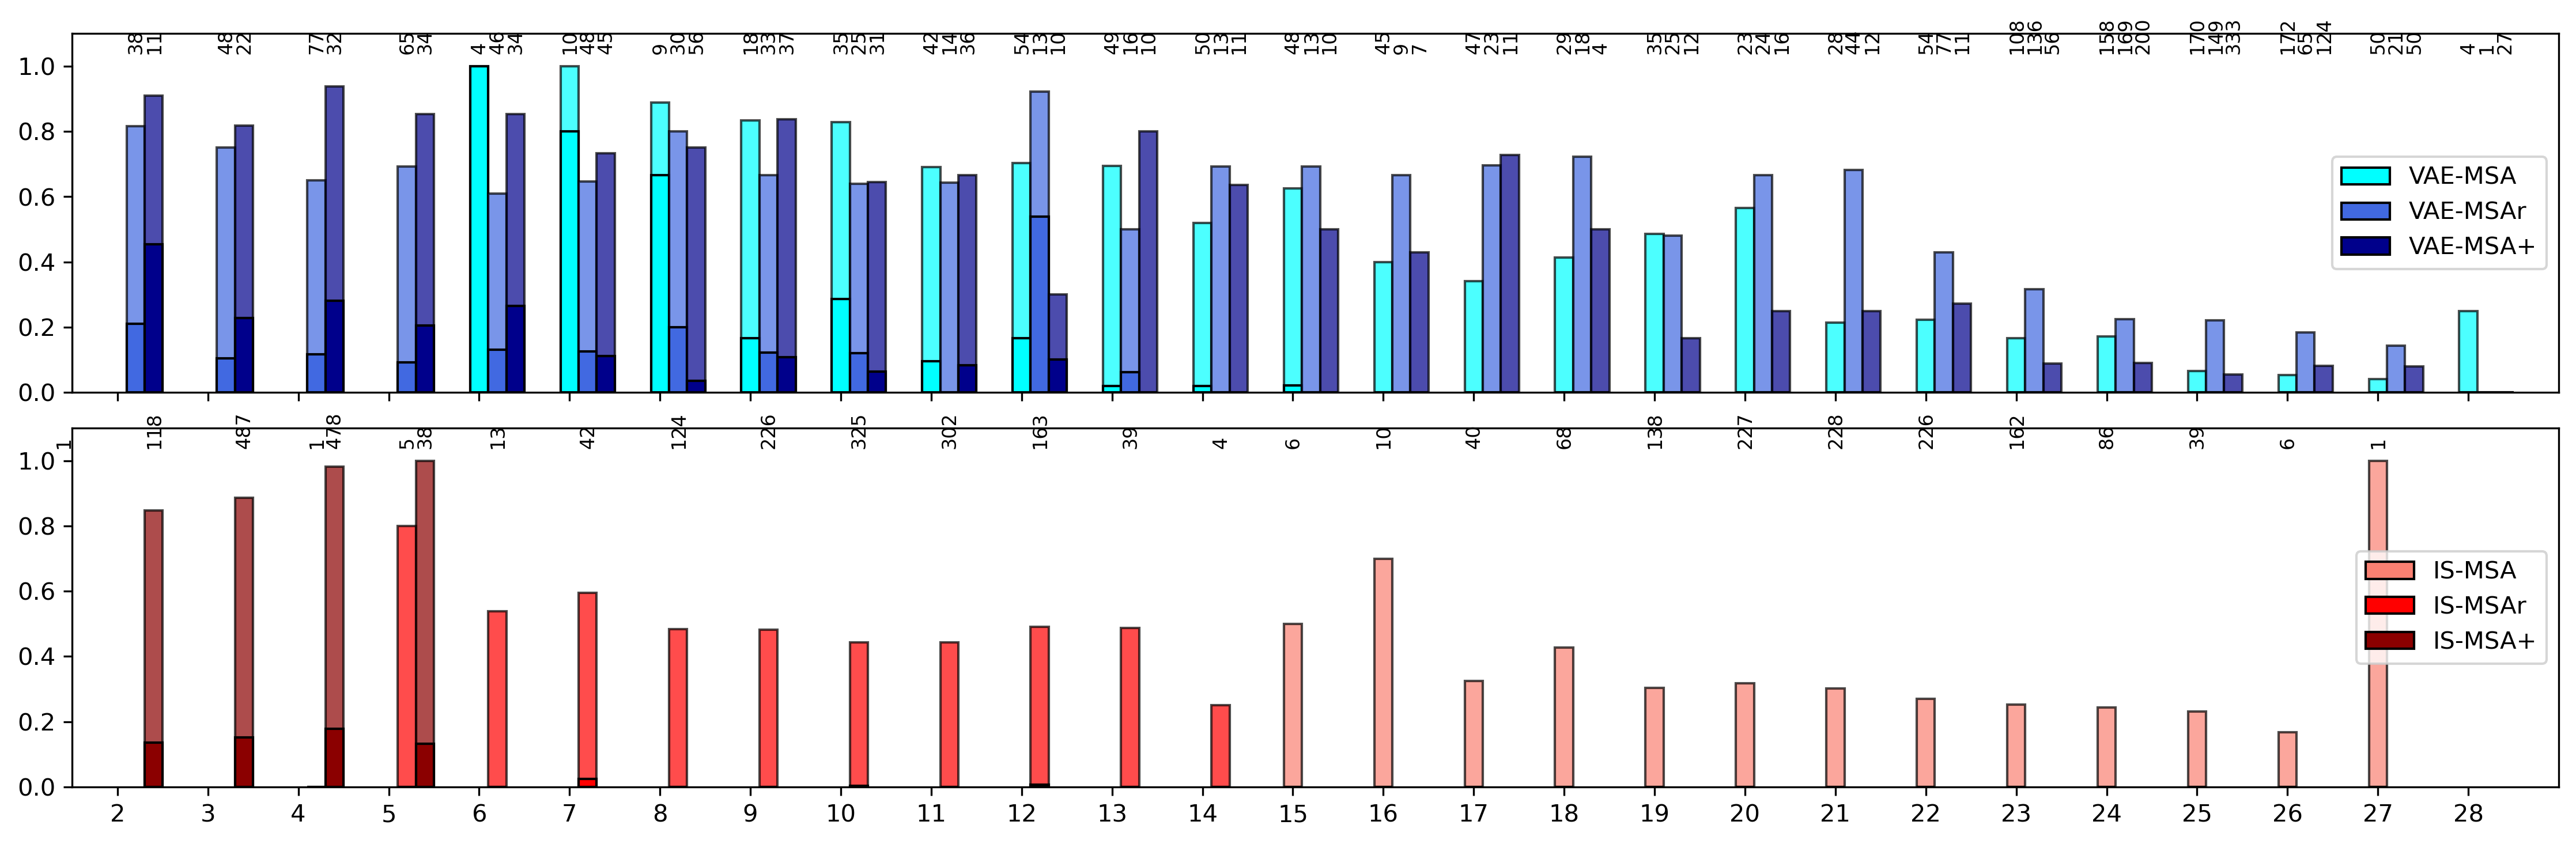

In [46]:

 
# set width of bar
barWidth = 0.2
fontsize=8
# set height of bar
bars1 = VAEMSAp.viable
bars2= VAEMSAp.beats_wt
bars3= VAEMSA.viable
bars4= VAEMSA.beats_wt

bars5= ISMSA.viable
bars6= ISMSA.beats_wt

bars7= ISMSAp.viable
bars8= ISMSAp.beats_wt

bars9= VAEMSAr.viable
bars10= VAEMSAr.beats_wt

bars11=ISMSAr.viable
bars12=ISMSAr.beats_wt


# bars2 = [28, 6, 16, 5, 10]
# bars3 = [29, 3, 24, 25, 17]
 
# Set position of bar on X axis
r = [x +barWidth*2 for x in np.array(VAEMSAp.mut)]
r2 = [x for x in np.array(VAEMSA.mut)]
r5=  [x+barWidth for x in np.array(VAEMSAr.mut)]

r3 = [x for x in np.array(ISMSA.mut)]
r4 = [x+barWidth*2 for x in np.array(ISMSAp.mut)]
r6=  [x+barWidth for x in np.array(ISMSAr.mut)]

# r2 = [x + barWidth for x in r1]
# r3 = [x + barWidth for x in r2]
 
# Make the plot
# plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='var1')
# plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='var2')
# plt.bar(r3, bars3, color='#2d7f5e', width=barWidth, edgecolor='white', label='var3')

# Create brown bars
fig,(ax1,ax2)= plt.subplots(2, 1, sharex=True, figsize=(15,5), dpi=300)

#plt.subplot(2, 1, 1)    

ax1.bar(r2, bars3, color='cyan', edgecolor='black', width=barWidth, alpha=0.7)
ax1.bar(r2, bars4, color='cyan', edgecolor='black', width=barWidth,label="VAE-MSA")
for i, v in enumerate(countsVMSA):
        ax1.text(r2[i]-.1, max(0.03,1.05) , str(v), color='black', fontweight='light',size=fontsize, rotation=90)

    
ax1.bar(r5, bars9, color='royalblue', edgecolor='black', width=barWidth,alpha=0.7)
ax1.bar(r5, bars10, color='royalblue', edgecolor='black', width=barWidth, label="VAE-MSAr")      

for i, v in enumerate(countsVMSAr):
    if i>0:
        ax1.text(r5[i]-.1, max(0.03,1.05) , str(v), color='black', fontweight='light',size=fontsize, rotation=90)

ax1.bar(r, bars1, color='darkblue', edgecolor='black', width=barWidth,alpha=0.7 )
ax1.bar(r, bars2, color='darkblue', edgecolor='black', width=barWidth,label="VAE-MSA+")
for i, v in enumerate(countsVMSAp):
    if i>0:
        ax1.text(r[i]-.1, max(1.05,0) , str(v), color='black', fontweight='light', size=fontsize, rotation=90)

  




ax2.bar(r3, bars5, color='salmon', edgecolor='black', width=barWidth,alpha=0.7)
ax2.bar(r3, bars6, color='salmon', edgecolor='black', width=barWidth, label="IS-MSA")

for i, v in enumerate(countsISMSA):
    #ax.text(r3[i]-0.1, max(0.1,bars5[i]-0.03) , str(v), color='black', fontweight='light',size=7, rotation=90)
    ax2.text(r3[i]-0.1, max(0.1,1.05) , str(v), color='black', fontweight='light',size=fontsize, rotation=90)

    
    
ax2.bar(r6, bars11, color='red', edgecolor='black', width=barWidth,alpha=0.7)
ax2.bar(r6, bars12, color='red', edgecolor='black', width=barWidth,  label="IS-MSAr")  
for i, v in enumerate(countsISMSAr):
    #ax.text(r4[i]-0.1,  max(0, bars7[i]-0.03),str(v), color='black', fontweight='light',size=7, rotation=90)
    ax2.text(r6[i]-0.1,  max(0, 1.05),str(v), color='black', fontweight='light',size=fontsize, rotation=90)    
    
ax2.bar(r4, bars7, color='darkred', edgecolor='black', width=barWidth,alpha=0.7)
ax2.bar(r4, bars8, color='darkred', edgecolor='black', width=barWidth,  label="IS-MSA+")
for i, v in enumerate(countsISMSAp):
    #ax.text(r4[i]-0.1,  max(0, bars7[i]-0.03),str(v), color='black', fontweight='light',size=7, rotation=90)
    ax2.text(r4[i]-0.1,  max(0, 1.05),str(v), color='black', fontweight='light',size=fontsize, rotation=90)


ax1.set_ylim([0, 1.1])

ax2.set_ylim([0, 1.1])

#Create green bars (middle), on top of the firs ones
# Create green bars (top)

    
# Add xticks on the middle of the group bars
#plt.xlabel('group', fontweight='bold')
#plt.xticks([r + barWidth for r in range(len(bars1))], ['A', 'B', 'C', 'D', 'E'])
plt.xlim(1.5,29)
plt.xticks(range(2,29))
# Create legend & Show graphic
ax1.legend(loc=7)    
ax2.legend(loc=7)
plt.tight_layout(w_pad=0.1,h_pad=0.1)


#plt.show()
#plt.savefig("new_figs/performance_bar_num_top_stacked_green_dd.pdf")

In [47]:
VAEMSAp=sub_vae_data[sub_vae_data.category=="VAE-MSA+"]
VAEMSA=sub_vae_data[sub_vae_data.category=="VAE-MSA"]
ISMSA=sub_vae_data[sub_vae_data.category=="IS-MSA"]
ISMSAp=sub_vae_data[sub_vae_data.category=="IS-MSA+"]

In [48]:
ticker_map={"most_likely":"^", "rand_samp":".", "linear":"x"}

In [49]:
sub_vae_data["ticker"]=sub_vae_data["sampling"].map(ticker_map)

In [52]:
VAEMSAp=sub_vae_data[sub_vae_data.category_orig=="VAE-MSA+"].drop_duplicates(subset=["aa"])
VAEMSAr=sub_vae_data[sub_vae_data.category_orig=="VAE-MSAr"].drop_duplicates(subset=["aa"])
VAEMSA=sub_vae_data[sub_vae_data.category_orig=="VAE-MSA"].drop_duplicates(subset=["aa"])
ISMSA=sub_vae_data[sub_vae_data.category_orig=="IS-MSA"].drop_duplicates(subset=["aa"])
ISMSAp=sub_vae_data[sub_vae_data.category_orig=="IS-MSA+"].drop_duplicates(subset=["aa"])
ISMSAr=sub_vae_data[sub_vae_data.category_orig=="IS-MSAr"].drop_duplicates(subset=["aa"])

In [53]:
output_vae_msa=[]
output_vae_msap=[]
output_vae_msar=[]

output_ismsa=[]
output_ismsap=[]
output_ismsar=[]
basis=np.arange(0.0,1.01,0.02)*100

def get_proportion_by_criteria(df,method,pct):
    number_of_variants=int(df.shape[0]*pct/100)
    top_t1=df.sort_values(method,ascending=False).head(number_of_variants)
    return (top_t1['beats_wt'].mean(), top_t1['viable'].mean())


for i in basis[::-1]:
      output_vae_msa.append(get_proportion_by_criteria(VAEMSA,"pred_fit", i))
      output_vae_msap.append(get_proportion_by_criteria(VAEMSAp,"pred_fit", i))
      output_vae_msar.append(get_proportion_by_criteria(VAEMSAr,"pred_fit", i))

      output_ismsa.append(get_proportion_by_criteria(ISMSA,"lin_fit", i))
      output_ismsap.append(get_proportion_by_criteria(ISMSAp,"lin_fit", i))
      output_ismsar.append(get_proportion_by_criteria(ISMSAr,"lin_fit", i))



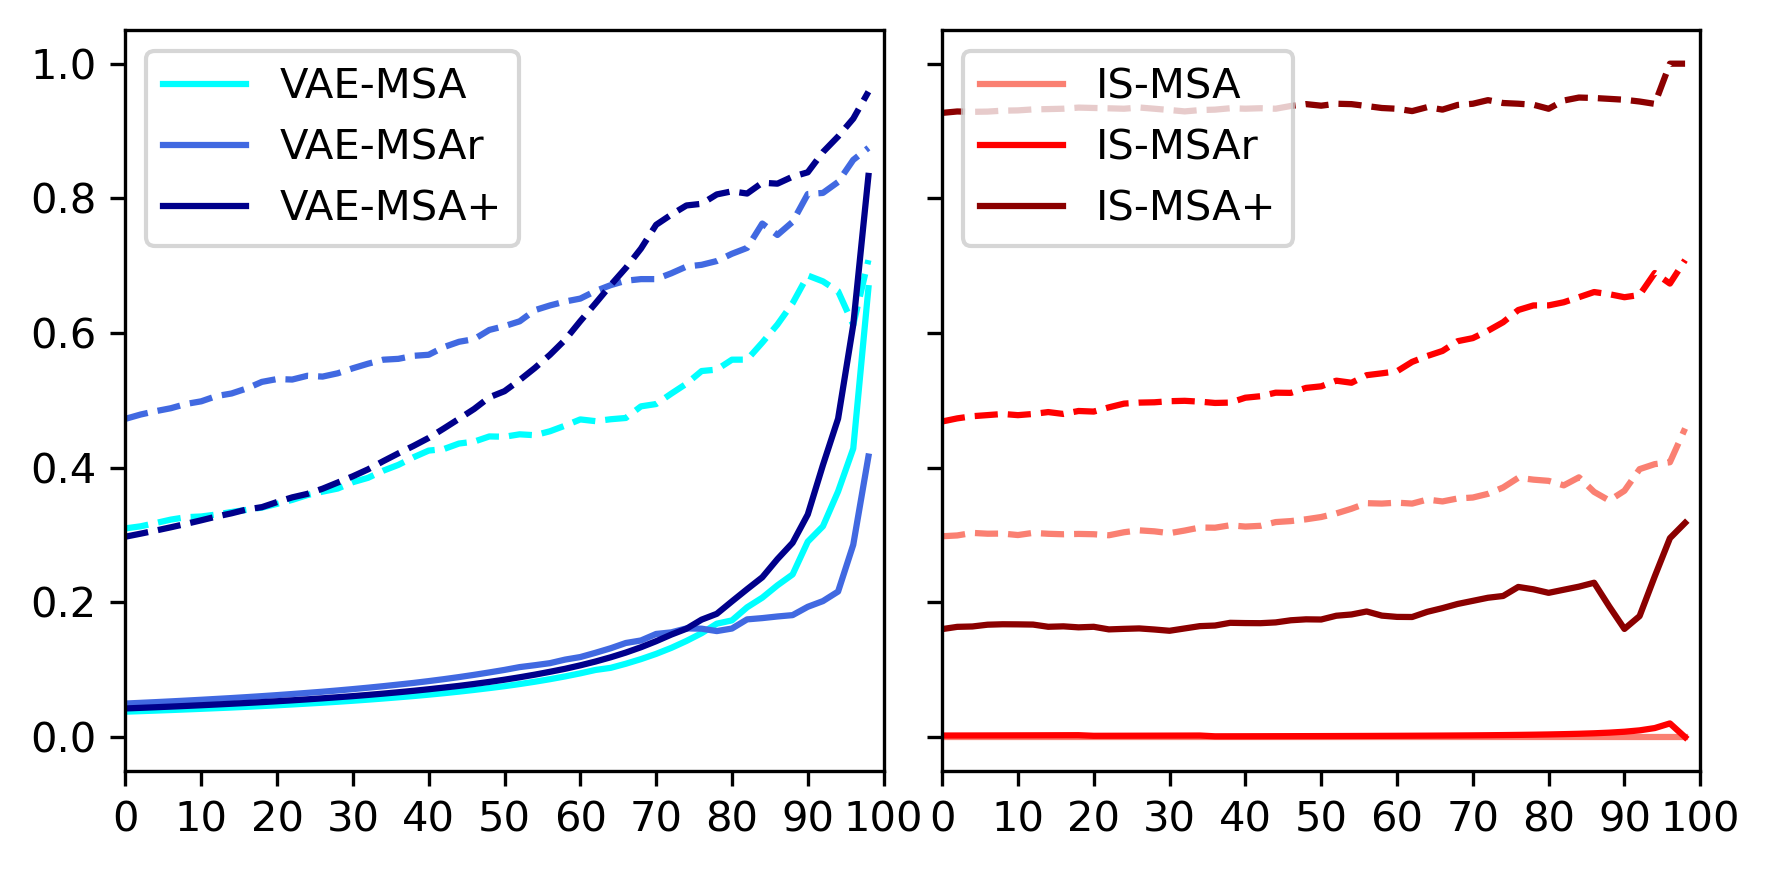

In [54]:
fig,(ax1,ax2)= plt.subplots(1, 2, sharey=True, figsize=(6,3), dpi=300)
ax1.plot(basis, [x[1] for x in output_vae_msa], "--", c="cyan")
ax1.plot(basis, [x[0] for x in output_vae_msa],"-", c="cyan", label="VAE-MSA")

ax1.plot(basis, [x[1] for x in output_vae_msar], "--", c='royalblue')
ax1.plot(basis, [x[0] for x in output_vae_msar],"-", c='royalblue',label="VAE-MSAr")

ax1.plot(basis, [x[1] for x in output_vae_msap], "--", c='darkblue')
ax1.plot(basis, [x[0] for x in output_vae_msap],"-", c='darkblue', label="VAE-MSA+")
ax1.set_ylim([-0.05,1.05])
ax1.set_xlim(0,100)
ax1.set_xticks(np.arange(0,101,10));

ax1.legend(loc=2)
ax2.plot(basis, [x[1] for x in output_ismsa], "--", c="salmon",)
ax2.plot(basis, [x[0] for x in output_ismsa],"-", c="salmon",label="IS-MSA")

ax2.plot(basis, [x[1] for x in output_ismsar], "--", c="red")
ax2.plot(basis, [x[0] for x in output_ismsar],"-", c="red",label="IS-MSAr")

ax2.plot(basis, [x[1] for x in output_ismsap], "--", c="darkred")
ax2.plot(basis, [x[0] for x in output_ismsap],"-", c="darkred",label="IS-MSA+")

ax2.legend(loc=2)
plt.xticks(np.arange(0,101,10));
plt.xlim(0,100)
plt.ylim(-0.05,1.05)
plt.tight_layout(w_pad=0.1,h_pad=0.1)

#plt.savefig("new_figs/raise_by_dataset_triplet_green_dd.pdf")

In [55]:
def compute_pairwise_editdistance(df):
    distances=[]
    set_seq=list(df["aa"])
    for i,x in enumerate(set_seq):
        for j in range(i ,len(set_seq)):
            distances.append(editdistance.eval(x, set_seq[j]))
    return distances

In [56]:
vaep_pair_dist=compute_pairwise_editdistance(VAEMSAp)


In [57]:
ISp_pair_dist=compute_pairwise_editdistance(ISMSAp)

In [58]:
IS_pair_dist=compute_pairwise_editdistance(ISMSA)

In [59]:
ISr_pair_dist=compute_pairwise_editdistance(ISMSAr)

In [60]:
vaer_pair_dist=compute_pairwise_editdistance(VAEMSAr)
vae_pair_dist=compute_pairwise_editdistance(VAEMSA)


/Users/sumsin/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/sumsin/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/sumsin/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

<AxesSubplot:ylabel='Density'>

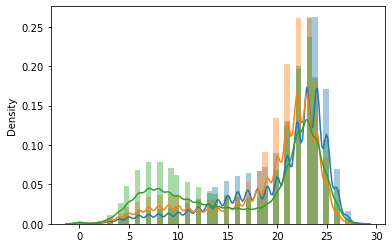

In [61]:
sns.distplot(vae_pair_dist)
sns.distplot(vaer_pair_dist)
sns.distplot(vaep_pair_dist)

/Users/sumsin/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/sumsin/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/sumsin/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

<AxesSubplot:ylabel='Density'>

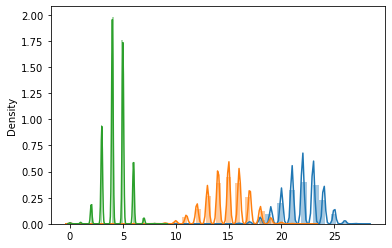

In [62]:
sns.distplot(IS_pair_dist)
sns.distplot(ISr_pair_dist)
sns.distplot(ISp_pair_dist)

In [63]:
np.mean(IS_pair_dist), np.mean(ISr_pair_dist),np.mean(ISp_pair_dist)

(21.92336062415845, 14.851109905861387, 4.311455659734953)

In [64]:
np.mean(vae_pair_dist),np.mean(np.mean(vaer_pair_dist)),np.mean(vaep_pair_dist)

(20.074692027366133, 19.086868427768774, 17.289460205446318)

In [65]:
sub_vae_data1=sub_vae_data#[sub_vae_data.colors.isin(["plum","magenta","darkviolet"])]

In [66]:
color_key2={ "IS-MSA":"salmon" , "VAE-MSA":"cyan" , "VAE-MSA+":"darkblue" , "IS-MSA+":"darkred",\
          "IS-MSAr":"red", "VAE-MSAr":"royalblue"}
sub_vae_data1["colors"]=sub_vae_data1["category_orig"].map(color_key2)


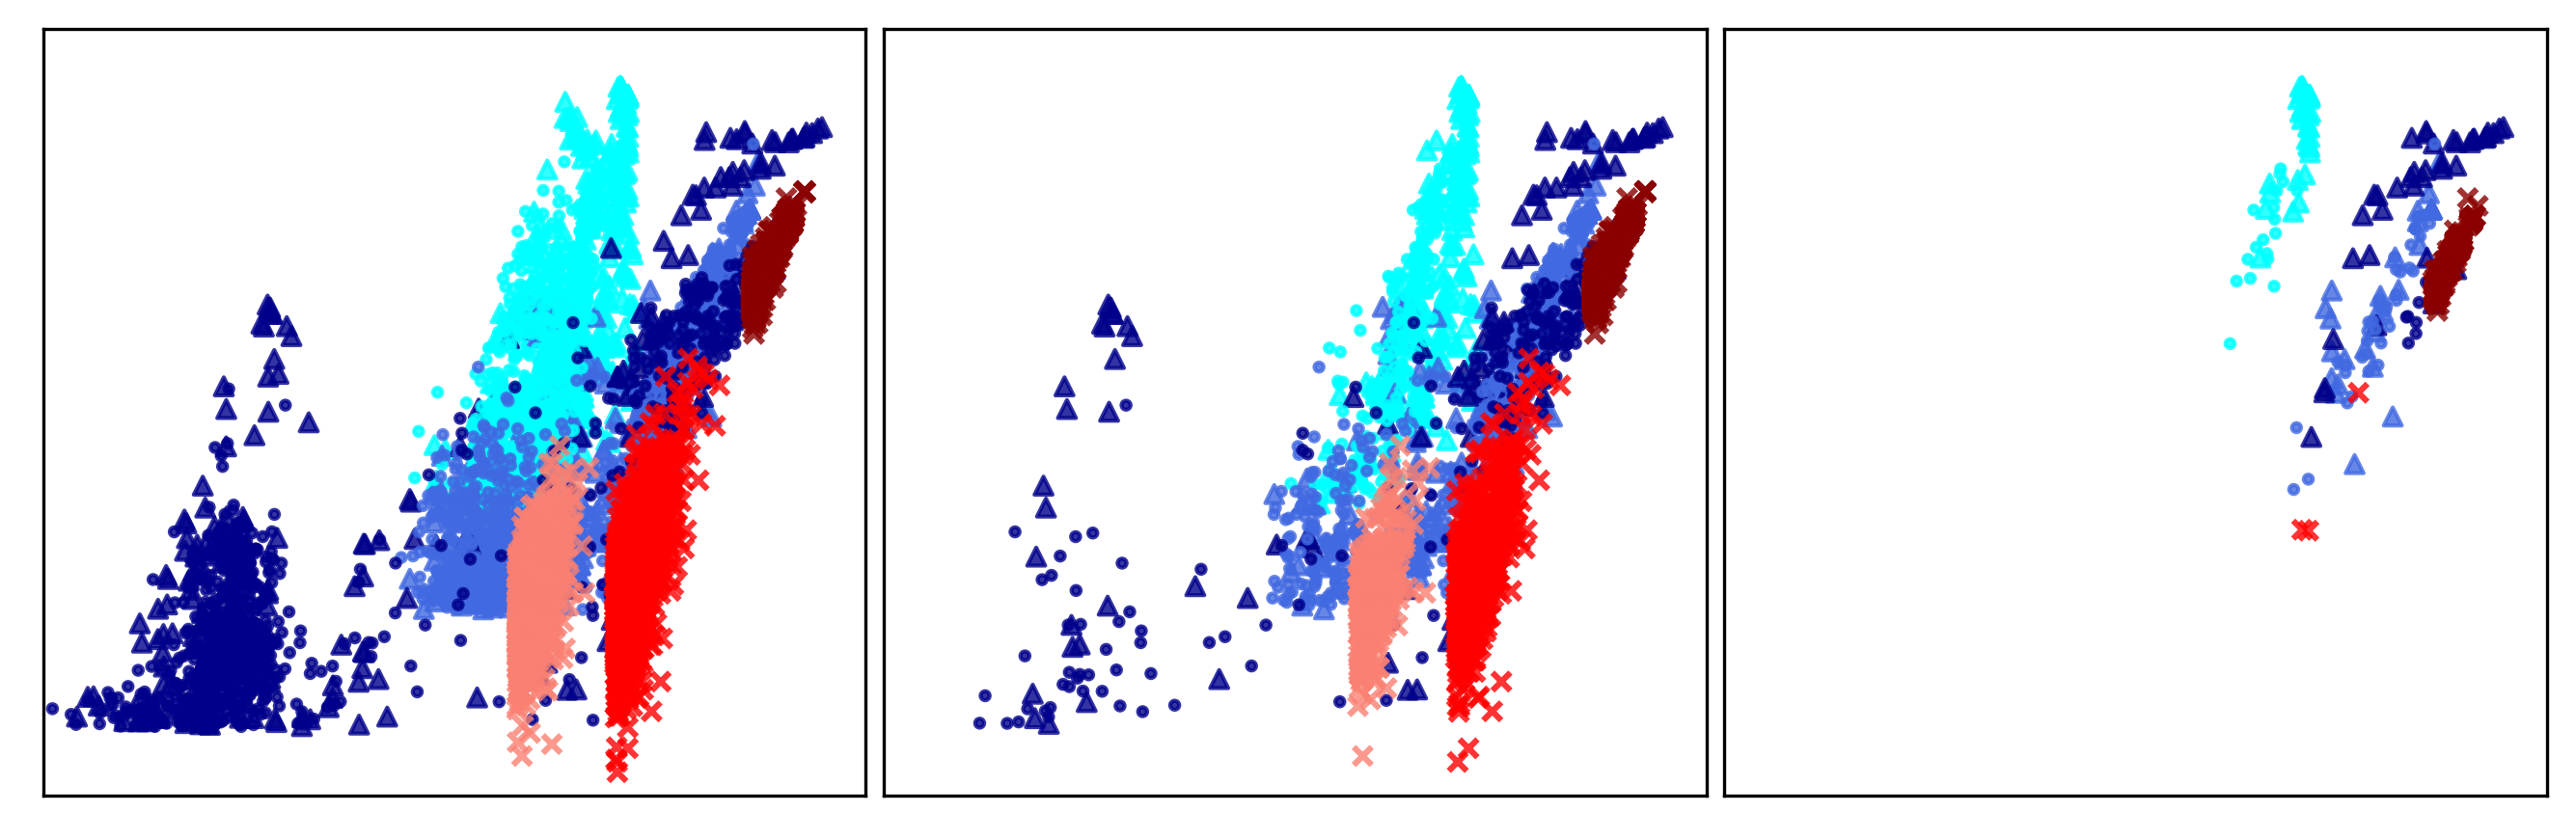

In [67]:
viablies=sub_vae_data1[sub_vae_data1.viable==1]
beats_wt=sub_vae_data1[sub_vae_data1.beats_wt==1]
plt.figure(figsize=(9,3), dpi=300)
alpha=0.8
size=20
plt.subplot(1, 3, 1)
for marker in set(sub_vae_data1.ticker):
     #   if marker in ["x"]:
            plt.scatter(sub_vae_data1[sub_vae_data1.ticker==marker].lin_fit, sub_vae_data1[sub_vae_data1.ticker==marker].pred_fit, c=sub_vae_data1[sub_vae_data1.ticker==marker].colors, marker=marker, s=size, alpha=alpha)
plt.xlim(-160,0)
plt.ylim(-45,35)
plt.xticks([])
plt.yticks([])

plt.subplot(1, 3, 2)
for marker in set(viablies.ticker):
 #   if marker in ["x"]:
#plt.scatter(sub_vae_data.lin_fit, sub_vae_data.pred_fit, c=sub_vae_data.colors,s=size, alpha=alpha)
        plt.scatter(viablies[viablies.ticker==marker].lin_fit, viablies[viablies.ticker==marker].pred_fit, c=viablies[viablies.ticker==marker].colors, marker=marker, s=size, alpha=alpha)
#plt.scatter(beats_wt.lin_fit, beats_wt.pred_fit, c=viablies.colors,s=size, alpha=alpha)

plt.xlim(-160,0)
plt.ylim(-45,35)

plt.xticks([])
plt.yticks([])
plt.subplot(1, 3, 3)
#plt.scatter(sub_vae_data.lin_fit, sub_vae_data.pred_fit, c=sub_vae_data.colors,s=size, alpha=alpha)
#plt.scatter(viablies.lin_fit, viablies.pred_fit, c=viablies.colors,s=size, alpha=alpha)
for marker in set(beats_wt.ticker):
   # if marker in ["x"]:

        plt.scatter(beats_wt[beats_wt.ticker==marker].lin_fit, beats_wt[beats_wt.ticker==marker].pred_fit, c=beats_wt[beats_wt.ticker==marker].colors, marker=marker, s=size, alpha=alpha)

plt.xlim(-160,0)
plt.ylim(-45,35)

plt.xticks([])
plt.yticks([])
plt.tight_layout(w_pad=0.1,h_pad=0.1)
#plt.savefig("new_figs/models_v_eachother_lin_green.pdf")